# Achieving robustness across season, location and cultivar for a NIRS model for intact mango fruit dry matter content

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r'/Users/brendaandreamorales/Documents/DIPLOMADO_1/Modulo 3/Proyecto_3/NAnderson2020MendeleyMangoNIRData.csv')

In [4]:
df.head()

,Set,Season,Region,Date,Type,Cultivar,Pop,Temp,DM,285,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.792506,0,...,0,0,0,0,0,0,0,0,0,0
1,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.792506,0,...,0,0,0,0,0,0,0,0,0,0
2,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.070979,0,...,0,0,0,0,0,0,0,0,0,0
3,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.070979,0,...,0,0,0,0,0,0,0,0,0,0
4,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.394013,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df['Set'].unique() #calibracion

array(['Cal', 'Tuning', 'Val Ext'], dtype=object)

In [6]:
df['Season'].unique() #temporada 

array([1, 2, 3, 4])

In [7]:
df['Region'].unique() #

array(['NT', 'QLD'], dtype=object)

In [8]:
df['Type'].unique ()

array(['Hard Green', 'Ripen'], dtype=object)

In [9]:
df['Cultivar'].unique ()

array(['Caly', 'KP', 'HG', 'Keitt', 'R2E2', '1243', 'LadyG', '1201',
       '4069', 'LadyJ'], dtype=object)

In [10]:
valores_unicos_n = df.nunique()
columnas_sn_info = valores_unicos_n[valores_unicos_n == 1]. index. tolist()
columnas_sn_info

['285',
 '288',
 '291',
 '294',
 '297',
 '300',
 '303',
 '306',
 '1152',
 '1155',
 '1158',
 '1161',
 '1164',
 '1167',
 '1170',
 '1173',
 '1176',
 '1179',
 '1182',
 '1185',
 '1188',
 '1191',
 '1194',
 '1197',
 '1200']

In [11]:
df.describe()

,Season,Pop,DM,285,288,291,294,297,300,303,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
count,11691.000000,11691.000000,11691.000000,11691.0,11691.0,11691.0,11691.0,11691.0,11691.0,11691.0,...,11691.0,11691.0,11691.0,11691.0,11691.0,11691.0,11691.0,11691.0,11691.0,11691.0
mean,2.337696,49.379608,16.282835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.068196,33.796239,2.459531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.000000,9.464606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,14.000000,14.332756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.000000,52.000000,16.301700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.000000,76.000000,18.112985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4.000000,112.000000,24.577150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_clean = df.drop(columnas_sn_info,axis=1)

In [13]:
df_clean.describe()

,Season,Pop,DM,309,312,315,318,321,324,327,...,1122,1125,1128,1131,1134,1137,1140,1143,1146,1149
count,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,...,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000
mean,2.337696,49.379608,16.282835,-0.121369,-0.122153,-0.122508,-0.122760,-0.123574,-0.124780,-0.125658,...,-0.323211,-0.294027,-0.255276,-0.200071,-0.134853,-0.035276,0.058209,0.137525,0.171213,0.182458
std,1.068196,33.796239,2.459531,0.177218,0.178044,0.178374,0.178914,0.180361,0.182574,0.184599,...,0.056236,0.068977,0.089079,0.120243,0.162074,0.235316,0.294900,0.353032,0.370885,0.373042
min,1.000000,1.000000,9.464606,-0.610657,-0.607814,-0.614915,-0.589506,-0.601815,-0.618811,-0.707419,...,-0.553501,-0.514751,-0.545750,-0.509488,-0.482428,-0.443344,-0.414142,-0.434827,-0.458881,-0.465784
25%,1.000000,14.000000,14.332756,-0.331782,-0.335830,-0.340406,-0.340728,-0.341510,-0.342603,-0.345229,...,-0.365899,-0.350053,-0.330336,-0.306436,-0.279341,-0.247373,-0.215033,-0.178159,-0.143085,-0.109969
50%,3.000000,52.000000,16.301700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.325182,-0.295433,-0.255710,-0.199960,-0.134800,-0.035392,0.048089,0.094603,0.084111,0.000000
75%,3.000000,76.000000,18.112985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.284981,-0.246765,-0.195338,-0.119508,-0.035183,0.099178,0.229992,0.345084,0.398310,0.420975
max,4.000000,112.000000,24.577150,0.148020,0.039739,0.006018,0.043728,0.034238,0.036741,0.103322,...,-0.043672,0.232951,0.576403,0.816770,1.554703,1.924093,1.875707,1.881044,1.837032,2.125556


In [14]:
df_clean = df_clean[df_clean[ 'Cultivar'] == 'Caly']

In [15]:
df_clean['Set'].unique()

array(['Cal', 'Tuning', 'Val Ext'], dtype=object)

In [16]:
df_test = df_clean[df_clean[ 'Set'] == 'Val Ext']
df_cal = df_clean[df_clean['Set'] != 'Val Ext']

In [17]:
df_cal.head()

,Set,Season,Region,Date,Type,Cultivar,Pop,Temp,DM,309,...,1122,1125,1128,1131,1134,1137,1140,1143,1146,1149
0,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.792506,-0.478784,...,-0.435326,-0.432677,-0.327782,-0.429858,-0.381867,-0.338903,-0.332650,-0.267678,-0.271822,-0.222478
1,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.792506,-0.527173,...,-0.425621,-0.360318,-0.433971,-0.331219,-0.347740,-0.338237,-0.286042,-0.269070,-0.228549,-0.230635
2,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.070979,-0.501680,...,-0.432784,-0.428193,-0.427225,-0.441603,-0.397718,-0.389544,-0.406758,-0.395734,-0.381844,-0.383979
3,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.070979,-0.455363,...,-0.438664,-0.443749,-0.415500,-0.407620,-0.424088,-0.387267,-0.387440,-0.394388,-0.403848,-0.388985
4,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.394013,-0.436971,...,-0.436217,-0.384951,-0.381970,-0.396246,-0.366629,-0.331301,-0.367609,-0.316976,-0.278354,-0.254439


In [18]:
df_cal['Set'].unique()

array(['Cal', 'Tuning'], dtype=object)

In [19]:
df_test['Set'].unique()

array(['Val Ext'], dtype=object)

In [59]:
y_test = df_test['DM']
y_cal = df_cal[ 'DM']
X_cal = df_cal.iloc[:,9:]
X_test = df_test.iloc[:,9:]

In [58]:
X_test.shape

(463, 281)

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
df_cal['Set'].unique()

array(['Cal', 'Tuning'], dtype=object)

In [24]:
df_cal.head()

,Set,Season,Region,Date,Type,Cultivar,Pop,Temp,DM,309,...,1122,1125,1128,1131,1134,1137,1140,1143,1146,1149
0,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.792506,-0.478784,...,-0.435326,-0.432677,-0.327782,-0.429858,-0.381867,-0.338903,-0.332650,-0.267678,-0.271822,-0.222478
1,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.792506,-0.527173,...,-0.425621,-0.360318,-0.433971,-0.331219,-0.347740,-0.338237,-0.286042,-0.269070,-0.228549,-0.230635
2,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.070979,-0.501680,...,-0.432784,-0.428193,-0.427225,-0.441603,-0.397718,-0.389544,-0.406758,-0.395734,-0.381844,-0.383979
3,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.070979,-0.455363,...,-0.438664,-0.443749,-0.415500,-0.407620,-0.424088,-0.387267,-0.387440,-0.394388,-0.403848,-0.388985
4,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.394013,-0.436971,...,-0.436217,-0.384951,-0.381970,-0.396246,-0.366629,-0.331301,-0.367609,-0.316976,-0.278354,-0.254439


In [25]:
X_cal

,309,312,315,318,321,324,327,330,333,336,...,1122,1125,1128,1131,1134,1137,1140,1143,1146,1149
0,-0.478784,-0.473973,-0.520787,-0.504875,-0.457819,-0.402840,-0.287658,-0.393823,-0.298228,-0.389325,...,-0.435326,-0.432677,-0.327782,-0.429858,-0.381867,-0.338903,-0.332650,-0.267678,-0.271822,-0.222478
1,-0.527173,-0.437459,-0.432212,-0.453319,-0.401421,-0.379517,-0.584032,-0.590916,-0.430159,-0.451906,...,-0.425621,-0.360318,-0.433971,-0.331219,-0.347740,-0.338237,-0.286042,-0.269070,-0.228549,-0.230635
2,-0.501680,-0.449072,-0.412682,-0.430094,-0.477864,-0.518983,-0.518602,-0.408991,-0.525265,-0.553890,...,-0.432784,-0.428193,-0.427225,-0.441603,-0.397718,-0.389544,-0.406758,-0.395734,-0.381844,-0.383979
3,-0.455363,-0.409809,-0.426535,-0.422015,-0.436697,-0.511022,-0.519885,-0.477157,-0.380288,-0.462902,...,-0.438664,-0.443749,-0.415500,-0.407620,-0.424088,-0.387267,-0.387440,-0.394388,-0.403848,-0.388985
4,-0.436971,-0.428836,-0.473545,-0.486633,-0.453210,-0.443006,-0.495762,-0.481034,-0.401428,-0.538858,...,-0.436217,-0.384951,-0.381970,-0.396246,-0.366629,-0.331301,-0.367609,-0.316976,-0.278354,-0.254439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.402222,-0.348971,-0.316996,-0.254803,-0.204488,-0.185047,-0.146959,-0.074227,-0.107625,-0.160561
10161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.351007,-0.287550,-0.269602,-0.192007,-0.108514,0.085336,0.178985,0.238851,0.257261,0.200535
10162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.401218,-0.376227,-0.367910,-0.252181,-0.222440,-0.084201,-0.058789,0.050597,0.118769,0.159340
10163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.384807,-0.380350,-0.382262,-0.274459,-0.241628,-0.193809,-0.272217,-0.230217,-0.220762,-0.265374


## PCA: Análisis de Componentes Principales

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score, mean_squared_error

In [55]:
PCR_Pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('pca', PCA()),
    ('regresion',LinearRegression())
]) 

MLR_Pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('regresion',LinearRegression())  
]) 

PLS_Pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('regresion', PLSRegression())
    
])

#### ENTRENAMIENTO

In [51]:
MLR_Pipeline.fit(X_cal,y_cal) # Regresión Lineal Multiple
PCR_Pipeline.fit(X_cal,y_cal) # Principal Component Regression

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('regresion', LinearRegression())])

# Métrica regresión lineal Multiple

In [52]:
pred_mlr = MLR_Pipeline.predict(X_test)
r2= r2_score(y_test,pred_mlr)
rmse= np.sqrt(mean_squared_error(y_test,pred_mlr))
print(f"El valor del R2 es: {r2}")
print(f"El valor de la RMSE es: {rmse}")

El valor del R2 es: 0.8813481552414157
El valor de la RMSE es: 0.752280120770391


# Métrica PCR: Regresión de Componentes Principales (Principal Component Regression)

In [30]:

pred_pcr = PCR_Pipeline.predict(X_test)
r2 = r2_score(y_test, pred_pcr)
rmse = np.sqrt(mean_squared_error(y_test, pred_pcr))

print(f"El valor del R2 es: {r2}")
print(f"El valor de la RMSE es: {rmse}")


El valor del R2 es: 0.8813481552207959
El valor de la RMSE es: 0.7522801208357579


In [31]:
pca = PCR_Pipeline.named_steps['pca']
explained_variance = pd.DataFrame(pca.explained_variance_ratio_)
explained_variance. cumsum()

,0
0,0.548157
1,0.767077
2,0.846339
3,0.911255
4,0.936010
...,...
276,1.000000
277,1.000000
278,1.000000
279,1.000000


el primer valor de 0.548157 significa que el primer componente principal captura aproximadamente el 54.8% de la variancia total en los datos.

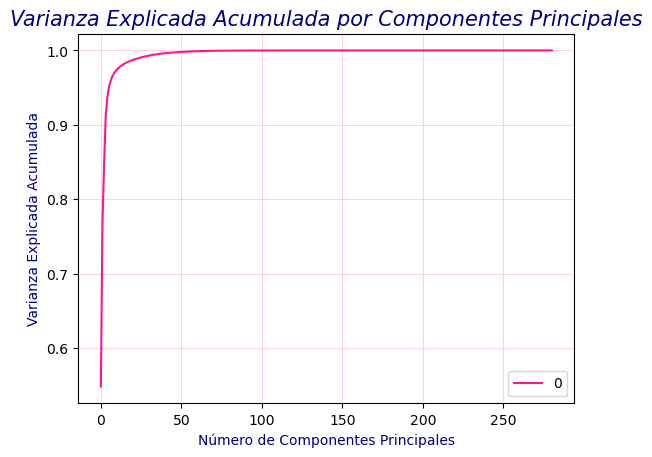

In [32]:
pca = PCR_Pipeline.named_steps['pca']
explained_variance = pd.DataFrame(pca.explained_variance_ratio_)
cumsum = explained_variance.cumsum()  #Calcula la suma acumulada de la variancia explicada.
cumsum.plot(color='deeppink')
plt.title('Varianza Explicada Acumulada por Componentes Principales',color='navy',fontsize=15, fontstyle='italic')
plt.xlabel('Número de Componentes Principales', color='navy')
plt.ylabel('Varianza Explicada Acumulada',color='navy')
plt.grid(color='pink', linestyle='-', linewidth=.5)
plt.show()


Al inicio, la curva sube rápidamente, lo que significa que los primeros componentes explican la mayor parte de la variancia.
Luego, la curva se estabiliza, indicando que añadir más componentes principales no añade mucha más variancia explicada.

## BUSQUEDA POR REGILLA

### Numero de componentes optimos

In [33]:
from sklearn.model_selection import GridSearchCV, KFold

pc_params = {
    'pca__n_components' : np.arange(1,280)
}
cv = KFold(n_splits=10, shuffle=True,random_state=42)
pc_grid = GridSearchCV(PCR_Pipeline,pc_params, cv = cv, scoring='neg_mean_squared_error')
pc_grid.fit(X_cal, y_cal)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('regresion', LinearRegression())]),
             param_grid={'pca__n_components': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,...
       196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279])},
             scoring='neg_mean_squared_error')

In [34]:
n_components = pc_grid.best_params_['pca__n_components']
print(f"El número óptimo de componentes principales es: {n_components}")

El número óptimo de componentes principales es: 214


## Método PLS: Partial Least Squares (PLS)

Técnica estadística utilizada para modelar relaciones entre variables predictoras y respuestas, especialmente cuando hay una alta colinealidad entre las variables predictoras o cuando el número de variables predictoras es mayor que el número de observaciones. PLS busca proyectar las variables predictoras y las variables respuesta en un espacio de menor dimensión, manteniendo la mayor parte de la variabilidad de los datos

In [74]:
PLS_Pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regresion', PLSRegression(n_components=100))
])

PLS_Pipeline.fit(X_cal,y_cal)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regresion', PLSRegression(n_components=100))])

In [75]:
# Metricas PCR
pred_pcr = PLS_Pipeline.predict(X_test)


In [76]:
pred_pcr = PLS_Pipeline.predict(X_test)
r2=(r2_score(y_test, pred_pcr) )
rmse=(np.sqrt (mean_squared_error (y_test,pred_pcr)))
print(f"El valor del R2 es: {r2}")
print(f"El valor de la RMSE es: {rmse}")

El valor del R2 es: 0.8875262489323933
El valor de la RMSE es: 0.7324330413376858
